In [1]:
%run "..\src\utils\style_and_packages.ipynb"

# Beispiel: Antwortspektrenverfahren an einem dreistöckigen Gebäude
## Aufgabenstellung

Das System in @fig-mms_3er_system zeigt ein dreistöckiges Gebäude. Modelliert wird dies als Dreimassenschwinger.

![Statisches System des dreigeschossigen Gebäudes](../images/aufgabe_mms_3er_system.svg
){#fig-mms_3er_system}

Gesucht:

- Bestimme die Steifigkeits- und Massenmatrix
- Bestimme die Eigenkreisfrequenzen
- Ermittle die daraus resultierenden Eigenvektoren
- Führe eine modale Analyse durch
    - Kontrolliere die Orthogonalität der transformierten Matrizen
    - Bestimme die Partizipationsfaktoren
- Ermittle die Pseudobeschleunigung anhand des Antwortspektrums der SIA261:2020
- Ermittle die daraus resultierende Deformationen (Überlagere mittels SRSS-Regel)
- Zeichne die maximalen Schnittkraftverläufe

Gegeben:

- Baugrundklasse $E$
- Erdbebenzone $Z2$



In [2]:
m_1, m_2, m_3 = sp.symbols('m_1, m_2, m_3')

EI_1, EI_2, EI_3, H_1, H_2, H_3 = sp.symbols("EI_1, EI_2, EI_3, H_1, H_2, H_3")


In [3]:
#| label: tbl-parameter_mms6
#| tbl-cap: Parameter der Aufgabe

params = {EI_1: 1.15*10**6 *unit.N*unit.m**2,
          EI_2: 0.766666*10**6 *unit.N*unit.m**2,
          EI_3: 1.15*10**6 *unit.N*unit.m**2,
          m_1:6000*unit.N*unit.second**2/unit.m,
          m_2:5000*unit.N*unit.second**2/unit.m,
          m_3:4000*unit.N*unit.second**2/unit.m,
          H_1:3.5*unit.m,
          H_2:3.5*unit.m,
          H_3:3.5*unit.m,
          }

params_plot = convert.param_value(params)
render.dict_to_table(params)

|   |   |
|---|---|
| $EI_{1} = 1150000.0 \text{m}^{2} \text{N}$ | $EI_{2} = 766666.0 \text{m}^{2} \text{N}$ |
| $EI_{3} = 1150000.0 \text{m}^{2} \text{N}$ | $H_{1} = 3.5 \text{m}$ |
| $H_{2} = 3.5 \text{m}$ | $H_{3} = 3.5 \text{m}$ |
| $m_{1} = \frac{6000 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{2} = \frac{5000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $m_{3} = \frac{4000 \text{N} \text{s}^{2}}{\text{m}}$ | |


{{< pagebreak >}}
## Musterlösung



### Massenmatrix $M$

![Auslenkung der Massen zur Ermittlung der Matrizen](../images/aufgabe_mms_3er_auslenk.svg){#fig-mms_3er_steifigkeit}

In [4]:
M = sp.Matrix([[m_1,0,0],[0,m_2,0],[0,0,m_3]])

render.eq_display(sp.MatrixSymbol('M', 3, 3), M,
                  sp.MatrixSymbol('M', 3, 3), M.subs(params))

    ⎡m₁  0   0 ⎤
    ⎢          ⎥
M = ⎢0   m₂  0 ⎥
    ⎢          ⎥
    ⎣0   0   m₃⎦

    ⎡                  2                                          ⎤
    ⎢6000⋅newton⋅second                                           ⎥
    ⎢───────────────────           0                    0         ⎥
    ⎢       meter                                                 ⎥
    ⎢                                                             ⎥
    ⎢                                       2                     ⎥
    ⎢                     5000⋅newton⋅second                      ⎥
M = ⎢         0           ───────────────────           0         ⎥
    ⎢                            meter                            ⎥
    ⎢                                                             ⎥
    ⎢                                                            2⎥
    ⎢                                          4000⋅newton⋅second ⎥
    ⎢         0                    0           ───────────────────⎥
    ⎣                                                 meter       ⎦

### Steifigkeitsmatrix $K$

#### Steifigkeit der Stockwerke

In [5]:
k_1 = 12 * EI_1 /H_1**3 * 2
k_2 = 12 * EI_2 / H_2**3 * 3 
k_3 = 12 * EI_3 / H_3**3 * 2 

render.eq_display("k_1", k_1,
'k_1', k_1.subs(params).simplify().evalf(3),
"k_2", k_2,
'k_2', k_2.subs(params).simplify().evalf(3),
"k_3", k_3,
'k_3', k_3.subs(params).simplify().evalf(3))

     24⋅EI₁
k₁ = ──────
        3  
      H₁   

     6.44e+5⋅newton
k₁ = ──────────────
         meter     

     36⋅EI₂
k₂ = ──────
        3  
      H₂   

     6.44e+5⋅newton
k₂ = ──────────────
         meter     

     24⋅EI₃
k₃ = ──────
        3  
      H₃   

     6.44e+5⋅newton
k₃ = ──────────────
         meter     

Abgefüllt in die Steifigkeitsmatrix

In [6]:
K = sp.Matrix([[k_1 + k_2, -k_2, 0],[-k_2,k_2+k_3, -k_3], [0,-k_3, k_3]])

render.eq_display(sp.MatrixSymbol('K', 3, 3), "Matrix([[k_1 + k_2, -k_2, 0],[-k_2,k_2+k_3, -k_3], [0,-k_3, k_3]])",
sp.MatrixSymbol('K', 3, 3), K,
                  sp.MatrixSymbol('K', 3, 3), K.subs(params).evalf(3))

    ⎡k₁ + k₂    -k₂     0 ⎤
    ⎢                     ⎥
K = ⎢  -k₂    k₂ + k₃  -k₃⎥
    ⎢                     ⎥
    ⎣   0       -k₃    k₃ ⎦

    ⎡24⋅EI₁   36⋅EI₂     -36⋅EI₂               ⎤
    ⎢────── + ──────     ────────         0    ⎥
    ⎢   3        3           3                 ⎥
    ⎢ H₁       H₂          H₂                  ⎥
    ⎢                                          ⎥
    ⎢   -36⋅EI₂       36⋅EI₂   24⋅EI₃  -24⋅EI₃ ⎥
    ⎢   ────────      ────── + ──────  ────────⎥
K = ⎢       3            3        3        3   ⎥
    ⎢     H₂           H₂       H₃       H₃    ⎥
    ⎢                                          ⎥
    ⎢                    -24⋅EI₃        24⋅EI₃ ⎥
    ⎢       0            ────────       ────── ⎥
    ⎢                        3             3   ⎥
    ⎣                      H₃            H₃    ⎦

    ⎡ 1.29e+6⋅newton   -6.44e+5⋅newton                   ⎤
    ⎢ ──────────────   ────────────────         0        ⎥
    ⎢     meter             meter                        ⎥
    ⎢                                                    ⎥
    ⎢-6.44e+5⋅newton    1.29e+6⋅newton   -6.44e+5⋅newton ⎥
K = ⎢────────────────   ──────────────   ────────────────⎥
    ⎢     meter             meter             meter      ⎥
    ⎢                                                    ⎥
    ⎢                  -6.44e+5⋅newton    6.44e+5⋅newton ⎥
    ⎢       0          ────────────────   ────────────── ⎥
    ⎣                       meter             meter      ⎦

### Eigenvektoren 

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand folgender Gleichung bestimmen:

$$
\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}
$${#eq-mms_3er_eigenkreisfreqs}

In [7]:
omega_n =sp.symbols('omega_n', real=True)
eq_omega = sp.det(K-omega_n**2*M)
omega_n_solve= sp.solve([eq_omega.subs(params_plot).simplify(), omega_n<=100, omega_n>=0], omega_n, dict=True)

omega_1 = omega_n_solve.args[0].rhs/unit.second
omega_2 = omega_n_solve.args[1].rhs/unit.second
omega_3 = omega_n_solve.args[2].rhs/unit.second



render.eq_display('omega_1', omega_1.evalf(3),
                  'omega_2', omega_2.evalf(3),
                  'omega_3', omega_3.evalf(3))



      5.28 
ω₁ = ──────
     second

      13.9 
ω₂ = ──────
     second

      20.3 
ω₃ = ──────
     second

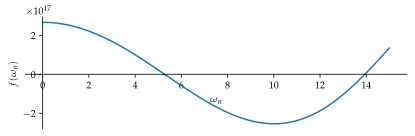

In [8]:
#| label: fig-loesung_eigenkreisfrequenzen
#| fig-cap: Nullstellen der @eq-mms_3er_eigenkreisfreqs
          
sp.plot(eq_omega.subs(params_plot).evalf(5).simplify(), (omega_n, 0,15),size=(5.9,2), show=False).show()

#### Eigenvektoren $\phi$
Durch das Einsetzen der bestimmten Eigenkreisfrequenzen lassen sich die Eigenvektoren bestimmen. 
Die Einträge des Eigenvektors sind voneinander abhängig und lassen sich dem Entsprechen beliebig definieren. Grundsätzlich wird der maximale Eigenwert zu $1$ gesetzt.

$$
\mathbf{K} - \omega_n^2 \mathbf{M} \phi_n= 0
$${#eq-mms_3er_mms_3_eigenvek}

In [9]:
phi_11, phi_21, phi_31 = sp.symbols('phi_11, phi_21, phi_31')

# Matrix und Gleichung definiert
phi_1 = sp.Matrix([[phi_11], [phi_21], [phi_31]])
expr = ((K-(omega_1*unit.second)**2 * M) * phi_1).subs(params_plot)

# Startwerte
params['phi_11'] = 1
params['phi_21'] = sp.solve(expr[0].subs(params), phi_21)[0]
params['phi_31'] = sp.solve(expr[1].subs(params), phi_31)[0]

# Normierung auf maximalwerte
phi_max = max(abs(phi_11.subs(params)), abs(phi_21.subs(params)), abs(phi_31.subs(params)))

params['phi_11'] = (phi_11 / phi_max).subs(params)
params['phi_21'] = (phi_21 / phi_max).subs(params)
params['phi_31'] = (phi_31 / phi_max).subs(params)


render.eq_display(sp.MatrixSymbol('phi_1', 3,1), phi_1.subs(params).evalf(3))

     ⎡0.475⎤
     ⎢     ⎥
φ₁ = ⎢0.827⎥
     ⎢     ⎥
     ⎣ 1.0 ⎦

In [10]:
phi_12, phi_22, phi_32 = sp.symbols('phi_12, phi_22, phi_32')

# Matrix und Gleichung definiert
phi_2 = sp.Matrix([[phi_12], [phi_22], [phi_32]])
expr = ((K-(omega_2*unit.second)**2 * M) * phi_2).subs(params_plot)

# Startwerte
params['phi_12'] = 1
params['phi_22'] = sp.solve(expr[0].subs(params), phi_22)[0]
params['phi_32'] = sp.solve(expr[1].subs(params), phi_32)[0]

# Normierung auf maximalwerte
phi_max = max(abs(phi_12.subs(params)), abs(phi_22.subs(params)), abs(phi_32.subs(params)))

params['phi_12'] = (phi_12 / phi_max).subs(params)
params['phi_22'] = (phi_22 / phi_max).subs(params)
params['phi_32'] = (phi_32 / phi_max).subs(params)


render.eq_display(sp.MatrixSymbol('phi_2', 3,1), phi_2.subs(params).evalf(3))

     ⎡ 1.0  ⎤
     ⎢      ⎥
φ₂ = ⎢0.188 ⎥
     ⎢      ⎥
     ⎣-0.908⎦

In [11]:
phi_13, phi_23, phi_33 = sp.symbols('phi_13, phi_23, phi_33')

# Matrix und Gleichung definiert
phi_3 = sp.Matrix([[phi_13], [phi_23], [phi_33]])
expr = ((K-(omega_3*unit.second)**2 * M) * phi_3).subs(params_plot)

# Startwerte
params['phi_13'] = 1
params['phi_23'] = sp.solve(expr[0].subs(params), phi_23)[0]
params['phi_33'] = sp.solve(expr[1].subs(params), phi_33)[0]

# Normierung auf maximalwerte
phi_max = max(abs(phi_13.subs(params)), abs(phi_23.subs(params)), abs(phi_33.subs(params)))

params['phi_13'] = (phi_13 / phi_max).subs(params)
params['phi_23'] = (phi_23 / phi_max).subs(params)
params['phi_33'] = (phi_33 / phi_max).subs(params)


render.eq_display(sp.MatrixSymbol('phi_3', 3,1), phi_3.subs(params).evalf(3))

     ⎡0.547⎤
     ⎢     ⎥
φ₃ = ⎢-1.0 ⎥
     ⎢     ⎥
     ⎣0.644⎦

### Modale Analyse

Die Modale Analyse zielt darauf ab, den Mehrmassenschwinger zu entkoppeln. Dazu wird in einem ersten Schritt die Orthogonalitätsbedingung kontrolliert. Diese muss erfüllt sein, um eine Entkoppelung durchzuführen. Siehe @sec-mms_nach_ortho für eine ausführliche Erklärung.

#### Orthogonalitätsbedingung

Angewendet auf die Massenmatrix:
Es zeigen sich kleine numerische Unreinheiten, welche vernachlässigt werden können.

In [12]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*M*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_3',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_3.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_3',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_3.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_3',2,1),(phi_1.T*M*phi_3).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_3',2,1),(phi_2.T*M*phi_3).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_3',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_3',2,1),(phi_3.T*M*phi_3).subs(params).evalf(3))


           ⎡                     2⎤
  T        ⎢8.77e+3⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

           ⎡                       2 ⎤
  T        ⎢-1.82e-12⋅newton⋅second  ⎥
φ₂ ⋅M⋅φ₁ = ⎢─────────────────────────⎥
           ⎣          meter          ⎦

           ⎡                      2 ⎤
  T        ⎢-5.0e-12⋅newton⋅second  ⎥
φ₃ ⋅M⋅φ₁ = ⎢────────────────────────⎥
           ⎣         meter          ⎦

           ⎡                       2 ⎤
  T        ⎢-1.82e-12⋅newton⋅second  ⎥
φ₁ ⋅M⋅φ₂ = ⎢─────────────────────────⎥
           ⎣          meter          ⎦

           ⎡                     2⎤
  T        ⎢9.47e+3⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

           ⎡                      2⎤
  T        ⎢1.91e-11⋅newton⋅second ⎥
φ₃ ⋅M⋅φ₂ = ⎢───────────────────────⎥
           ⎣         meter         ⎦

           ⎡                      2 ⎤
  T        ⎢-5.0e-12⋅newton⋅second  ⎥
φ₁ ⋅M⋅φ₃ = ⎢────────────────────────⎥
           ⎣         meter          ⎦

           ⎡                      2⎤
  T        ⎢1.91e-11⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₃ = ⎢───────────────────────⎥
           ⎣         meter         ⎦

           ⎡                     2⎤
  T        ⎢8.45e+3⋅newton⋅second ⎥
φ₃ ⋅M⋅φ₃ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

Für die Steifigkeitsmatrix:

In [13]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*K*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*K*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_3',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_3.T*K*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*K*phi_2).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*K*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_3',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_3.T*K*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_3',2,1),(phi_1.T*K*phi_3).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_3',2,1),(phi_2.T*K*phi_3).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_3',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_3',2,1),(phi_3.T*K*phi_3).subs(params).evalf(3))


  T        ⎡2.44e+5⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡1.88e-9⋅newton⎤
φ₂ ⋅K⋅φ₁ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡6.26e-10⋅newton⎤
φ₃ ⋅K⋅φ₁ = ⎢───────────────⎥
           ⎣     meter     ⎦

  T        ⎡1.88e-9⋅newton⎤
φ₁ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡1.84e+6⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡4.83e-9⋅newton⎤
φ₃ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡6.26e-10⋅newton⎤
φ₁ ⋅K⋅φ₃ = ⎢───────────────⎥
           ⎣     meter     ⎦

  T        ⎡4.83e-9⋅newton⎤
φ₂ ⋅K⋅φ₃ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡3.47e+6⋅newton⎤
φ₃ ⋅K⋅φ₃ = ⎢──────────────⎥
           ⎣    meter     ⎦

#### Modal- und Spektralmatrix

Mittels der Modal- und Spektralmatrix lassen sich die generalisierten Grössen effizient ermitteln.

In [14]:
Phi = sp.Matrix([[phi_1, phi_2, phi_3]])
Omega = sp.Matrix([[omega_1, 0, 0],[0, omega_2, 0],[0, 0, omega_3]])

render.eq_display('Modalmatrix', 'Phi',
                  sp.MatrixSymbol('Phi', 3, 3), Phi.subs(params).evalf(4),
                  'Spektralmatrix', 'Omega^2',
                  sp.MatrixSymbol('Omega^2', 3, 3), (Omega**2).subs(params).evalf(4))

Modalmatrix = Φ

    ⎡0.4752    1.0    0.5468⎤
    ⎢                       ⎥
Φ = ⎢0.827   0.1885    -1.0 ⎥
    ⎢                       ⎥
    ⎣ 1.0    -0.9076  0.6441⎦

                  2
Spektralmatrix = Ω 

     ⎡ 27.84                   ⎤
     ⎢───────     0        0   ⎥
     ⎢      2                  ⎥
     ⎢second                   ⎥
     ⎢                         ⎥
     ⎢          194.4          ⎥
     ⎢   0     ───────     0   ⎥
Ω² = ⎢               2         ⎥
     ⎢         second          ⎥
     ⎢                         ⎥
     ⎢                   410.8 ⎥
     ⎢   0        0     ───────⎥
     ⎢                        2⎥
     ⎣                  second ⎦

#### Generalisierte Grössen

Zur Reduktion des Rechenaufwands werden die numerischen Unreinheiten zu Null gesetzt.

In [15]:
M_star = Phi.T * M * Phi
K_star = Phi.T * K * Phi

M_star_clean = set_small_values_to_zero(M_star.subs(params).evalf(5), 0.1*unit.N *unit.second**2 / unit.m)
K_star_clean = set_small_values_to_zero(K_star.subs(params).evalf(5), 0.1*unit.N  / unit.m)

render.eq_display(sp.MatrixSymbol('M^\star', 3,3),sp.simplify(M_star_clean.subs(params)).evalf(5),
                  sp.MatrixSymbol('K^\star', 3,3),sp.simplify(K_star_clean.subs(params)).evalf(5))
                 

           ⎡                    2                                             
           ⎢8774.2⋅newton⋅second                                              
           ⎢─────────────────────            0                      0         
           ⎢        meter                                                     
           ⎢                                                                  
           ⎢                                           2                      
           ⎢                       9472.3⋅newton⋅second                       
M__\star = ⎢          0            ─────────────────────            0         
           ⎢                               meter                              
           ⎢                                                                  
           ⎢                                                                  
           ⎢                                              8452.9⋅newton⋅second
           ⎢          0                      0      

           ⎡2.4429e+5⋅newton                                   ⎤
           ⎢────────────────         0                0        ⎥
           ⎢     meter                                         ⎥
           ⎢                                                   ⎥
           ⎢                  1.841e+6⋅newton                  ⎥
K__\star = ⎢       0          ───────────────         0        ⎥
           ⎢                       meter                       ⎥
           ⎢                                                   ⎥
           ⎢                                   3.4725e+6⋅newton⎥
           ⎢       0                 0         ────────────────⎥
           ⎣                                        meter      ⎦

#### Modale Höhen

Die modalen Höhen bestimmen sich aus @eq-mms_3er_modale_hoehe:

$$
H_n = \frac{L_n^\theta}{L_n}
$${#eq-mms_3er_modale_hoehe}


$$
L_n = \phi_n^T \cdot \mathbf{M 1}
$${#eq-mms_3er_L_n}

$$
L_n^\theta = \sum_{j=1}^N H_j \cdot m_j \cdot \phi_{jn}
$${#eq-mms_3er_L_n_theta}

Angewendet auf das Beispiel folgt:

In [16]:
one_vec = sp.ones(3,1)


H_matrix = sp.Matrix([H_1, H_2, H_3])
H_modal = (H_matrix.T*M*Phi).T.multiply_elementwise((M*Phi.T*one_vec).applyfunc(lambda x: x**-1))


render.eq_display(
    sp.MatrixSymbol('H', 3,1), H_matrix,
    sp.MatrixSymbol('H', 3,1), H_modal,
    sp.MatrixSymbol('H', 3,1), H_modal.subs(params).evalf(3),

)

    ⎡H₁⎤
    ⎢  ⎥
H = ⎢H₂⎥
    ⎢  ⎥
    ⎣H₃⎦

    ⎡H₁⋅m₁⋅φ₁₁ + H₂⋅m₂⋅φ₂₁ + H₃⋅m₃⋅φ₃₁⎤
    ⎢─────────────────────────────────⎥
    ⎢     m₁⋅φ₁₁ + m₁⋅φ₂₁ + m₁⋅φ₃₁    ⎥
    ⎢                                 ⎥
    ⎢H₁⋅m₁⋅φ₁₂ + H₂⋅m₂⋅φ₂₂ + H₃⋅m₃⋅φ₃₂⎥
H = ⎢─────────────────────────────────⎥
    ⎢     m₂⋅φ₁₂ + m₂⋅φ₂₂ + m₂⋅φ₃₂    ⎥
    ⎢                                 ⎥
    ⎢H₁⋅m₁⋅φ₁₃ + H₂⋅m₂⋅φ₂₃ + H₃⋅m₃⋅φ₃₃⎥
    ⎢─────────────────────────────────⎥
    ⎣     m₃⋅φ₁₃ + m₃⋅φ₂₃ + m₃⋅φ₃₃    ⎦

    ⎡2.78⋅meter⎤
    ⎢          ⎥
H = ⎢8.25⋅meter⎥
    ⎢          ⎥
    ⎣3.93⋅meter⎦

Modalen Höhen kleiner als null sind zu vernachlässigen.

#### Kontrolle der modalen Transformation

Die Eigenkreisfrequenzen ändern sich durch die Transformation nicht.

In [17]:
omega_1_kontrolle = sp.sqrt(K_star_clean[0] / M_star_clean[0])
omega_2_kontrolle = sp.sqrt(K_star_clean[4] / M_star_clean[4])
omega_3_kontrolle = sp.sqrt(K_star_clean[8] / M_star_clean[8])


render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_1_modal', omega_1_kontrolle.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(4),
                  'omega_2_modal', omega_2_kontrolle.subs(params).simplify().evalf(4),
                  'omega_3', omega_3.subs(params).simplify().evalf(4),
                  'omega_3_modal', omega_3_kontrolle.subs(params).simplify().evalf(4))




      5.28 
ω₁ = ──────
     second

             5.28 
ω_1_modal = ──────
            second

     13.94 
ω₂ = ──────
     second

            13.94 
ω_2_modal = ──────
            second

     20.27 
ω₃ = ──────
     second

            20.27 
ω_3_modal = ──────
            second

#### Partizipationsfaktor $\Gamma$

Die Verteilung des Partizipationsfaktor gibt einen direkten Hinweis, welcher Eigenmode an der Gesamtanwort den grössten Einfluss (beteiligt bzw. partizipiert) hat.

$$
\Gamma_n = \frac{\Phi_n^T \mathbf{M 1}}{\Phi_n^T \mathbf{M}\Phi_n}
$${#eq-mms_3er_part}


In allgemeiner Form lautet der Partizipationsfaktor:

$$
\Gamma_n = \frac{\Phi_n^T \mathbf{M r^\star}}{\Phi_n^T \mathbf{M}\Phi_n}
$${#eq-mms_3er_split_part}

$\mathbf{r^\star}$ beschreibt die Starrkörperverschiebung infolge der Erdbebenanregung $u_g$ am Fusspunkt des Gesamtsystems.



$$
\mathbf{r^\star} = \begin{bmatrix}
FHG_1 \\
FHG_2 
\end{bmatrix}=
\begin{bmatrix}
\cos(0) \\
\cos(0) 
\end{bmatrix}=
\begin{bmatrix}
1 \\
1 
\end{bmatrix}= \mathbf{1}
$${#eq-mms_3er_starrkoerperverschiebung}

Die Partizipationsmatrix lässt sich direkt durch folgende Gleichung ermitteln:

$$
\Gamma = M^{\star-1} \cdot \Phi^T \cdot M \cdot 1
$${#eq-mms_3er_matrix_part}

Gelöst mit @eq-mms_3er_matrix_part:

In [18]:

Gamma = M_star_clean**-1 * Phi.T * M*one_vec 

render.eq_display(
    sp.MatrixSymbol('Gamma',3,1), Gamma.subs(params).evalf(3))

    ⎡1.25 ⎤
    ⎢     ⎥
Γ = ⎢0.35 ⎥
    ⎢     ⎥
    ⎣0.101⎦

Gelöst mit @eq-mms_3er_split_part:

In [19]:


gamma_1 = (phi_1.T*M*one_vec)[0]/(phi_1.T*M*phi_1)[0]
gamma_2 = (phi_2.T*M*one_vec)[0]/(phi_2.T*M*phi_2)[0]
gamma_3 = (phi_3.T*M*one_vec)[0]/(phi_3.T*M*phi_3)[0]

gamma_sqr = sp.Matrix([[gamma_1**2],[gamma_2**2]])
render.eq_display('Gamma_1', gamma_1,
                  'Gamma_1', gamma_1.subs(params).evalf(3),
                  'Gamma_2', gamma_2,
                  'Gamma_2', gamma_2.subs(params).evalf(3),
                  'Gamma_3', gamma_3,
                  'Gamma_3', gamma_3.subs(params).evalf(3))

       m₁⋅φ₁₁ + m₂⋅φ₂₁ + m₃⋅φ₃₁ 
Γ₁ = ───────────────────────────
           2         2         2
     m₁⋅φ₁₁  + m₂⋅φ₂₁  + m₃⋅φ₃₁ 

Γ₁ = 1.25

       m₁⋅φ₁₂ + m₂⋅φ₂₂ + m₃⋅φ₃₂ 
Γ₂ = ───────────────────────────
           2         2         2
     m₁⋅φ₁₂  + m₂⋅φ₂₂  + m₃⋅φ₃₂ 

Γ₂ = 0.35

       m₁⋅φ₁₃ + m₂⋅φ₂₃ + m₃⋅φ₃₃ 
Γ₃ = ───────────────────────────
           2         2         2
     m₁⋅φ₁₃  + m₂⋅φ₂₃  + m₃⋅φ₃₃ 

Γ₃ = 0.101

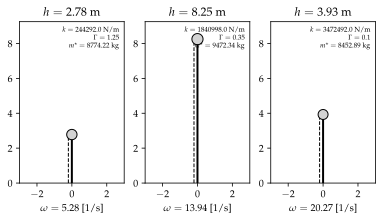

In [20]:
#| label: fig-mms_3_modale_EMS
#| fig-cap: "Darstellung der entkoppelten Einmassenschwinger"


hoehe = list(H_modal.subs(params).evalf(3)/unit.m)
hoehe = [np.float64(i).round(2) for i in hoehe]

masse = list(M_star_clean/unit.N/unit.second**2 * unit.m)
masse = [np.float64(i).round(2) for i in masse if i != 0]

steifigkeiten = list(K_star_clean/unit.N * unit.m)
steifigkeiten = [np.float64(i).round(2) for i in steifigkeiten if i != 0]

omegas = list(Omega*unit.second)
omegas = [np.float64(i).round(2) for i in omegas if i != 0]

gammas = list(Gamma.subs(params).evalf(3))
gammas = [np.float64(i).round(2) for i in gammas if i != 0]


plot_einmassenschwinger(hoehe, masse, steifigkeiten, omegas, gammas)


### Elastisches Antwortspektrum

Aus der Aufgabenstellung darf nach [@SIA261_2020] Abs. 16.2.3.1 Kurve $E$ gewählt werden.

In [21]:
a_gd = 1 *unit.m /unit.second**2

#### Grundschwingzeit

Die Grundschwingzeit kann anhand der bereits ermittelten Eigenkreisfrequenzen ermittelt werden.

$$
T = \frac{2 \pi}{\omega}
$${#eq-mms_3er_eigenperiode}

In [22]:
T_1 = ((2*sp.pi)/omega_1)
T_2 = ((2*sp.pi)/omega_2)
T_3 = ((2*sp.pi)/omega_3)

render.eq_display('T_1', T_1.subs(params).evalf(3),
                  'T_2', T_2.subs(params).evalf(3),
                  'T_3', T_3.subs(params).evalf(3),
                  )

T₁ = 1.19⋅second

T₂ = 0.451⋅second

T₃ = 0.31⋅second

#### Elastisches Antwortspektrum

Es wird für sämtliche Eigenperioden die Pseudobeschleunigung bestimmt. Siehe dazu @SIA261_2020.

In [23]:
S_e_1 = antwortspektrum(a_gd, T_1.subs(params).evalf(3), Baugrundklasse='D')
render.eq_display('S_e_1', S_e_1.evalf(3))

|   |   |
|---|---|
| $S = 1.7$ | $T_{B} = 0.1 \text{s}$ |
| $T_{C} = 0.5 \text{s}$ | $T_{D} = 2.0 \text{s}$ |
| $\eta = 1$ | |


     2.5⋅S⋅T_C⋅a_gd⋅η
Sₑ = ────────────────
            T        

       1.78⋅meter
Sₑ ₁ = ──────────
              2  
        second   

In [24]:
S_e_2 = antwortspektrum(a_gd, T_2.subs(params).evalf(3), Baugrundklasse = 'D')

render.eq_display('S_e_2', S_e_2.evalf(3))

|   |   |
|---|---|
| $S = 1.7$ | $T_{B} = 0.1 \text{s}$ |
| $T_{C} = 0.5 \text{s}$ | $T_{D} = 2.0 \text{s}$ |
| $\eta = 1$ | |


Sₑ = 2.5⋅S⋅a_gd⋅η

       4.25⋅meter
Sₑ ₂ = ──────────
              2  
        second   

In [25]:
S_e_3 = antwortspektrum(a_gd, T_3.subs(params).evalf(3), Baugrundklasse = 'D')

render.eq_display('S_e_3', S_e_3.evalf(3))

|   |   |
|---|---|
| $S = 1.7$ | $T_{B} = 0.1 \text{s}$ |
| $T_{C} = 0.5 \text{s}$ | $T_{D} = 2.0 \text{s}$ |
| $\eta = 1$ | |


Sₑ = 2.5⋅S⋅a_gd⋅η

       4.25⋅meter
Sₑ ₃ = ──────────
              2  
        second   

### Maximale Deformation

Die maximale Deformation resultiert aus der Beschleunigung $S_e$ und der Eigenkreisfrequenz $\omega_n^2$. Für die modalen EMS gilt es diese anhand der Partizipationsfaktoren zu gewichten. Zur effektiven Bestimmung der Auslenkung sind die Resultate der EMS mittels SRSS-Regel zu überlagern.

In [26]:
q_1_max = Gamma[0] * S_e_1 / omega_1**2
q_2_max = Gamma[1] * S_e_2 / omega_2**2
q_3_max = Gamma[2] * S_e_3 / omega_3**2

render.eq_display(
    'q_1_max',"Gamma_1 * S_e_1 / omega_1**2",
    'q_1_max', q_1_max.subs(params).evalf(3),
    'q_2_max',"Gamma_2 * S_e_2 / omega_2**2",
    'q_2_max', q_2_max.subs(params).evalf(3),    
    'q_3_max',"Gamma_3 * S_e_3 / omega_3**2",
    'q_3_max', q_3_max.subs(params).evalf(3))


         Γ₁⋅Sₑ ₁
q₁ ₘₐₓ = ───────
             2  
           ω₁   

q₁ ₘₐₓ = 0.0803⋅meter

         Γ₂⋅Sₑ ₂
q₂ ₘₐₓ = ───────
             2  
           ω₂   

q₂ ₘₐₓ = 0.00765⋅meter

         Γ₃⋅Sₑ ₃
q₃ ₘₐₓ = ───────
             2  
           ω₃   

q₃ ₘₐₓ = 0.00105⋅meter

Um die Entkoppelung rückzuführen, gilt es die erhaltenen Resultate zu überlagern. Dabei gibt es unterschiedliche Ansätze. Bei weit auseinander liegenden Eigenfrequenzen kann die SRSS-Überlagerung (Square-root of the sum of squares) verwendet werden.

$$
u_{max} = \sqrt{\sum_{n=1}^2 (q_{n} \cdot \phi_n)^2}
$${#eq-mms_3er_srss}

In [27]:
u_max = ((phi_1*q_1_max).applyfunc(lambda x: x**2)+(phi_2*q_2_max).applyfunc(lambda x: x**2)+(phi_3*q_3_max).applyfunc(lambda x: x**2)).applyfunc(sp.sqrt)


render.eq_display(sp.MatrixSymbol('u_max', 3,1), u_max.subs(params).evalf(3))

       ⎡0.0389⋅meter⎤
       ⎢            ⎥
uₘₐₓ = ⎢0.0664⋅meter⎥
       ⎢            ⎥
       ⎣0.0806⋅meter⎦

[Stephan, wieso multiplizierst du die SRSS- Überlagerung nochmals mit ]{.underline} $phi_1$

![Frage](../images/Frage_1.png)


### Maximale Schnittkräfte

#### Querkräfte

Die Einwirkungen resultieren aus der Masse multipliziert mit der Beschleunigung aus dem Antwortspektrum. Dazu sind in einem ersten Schritt die beiden entkoppelten EMS voneinander getrennt zu betrachten. Die Überlagerung erfolgt erst bei den ermittelten Querkräften.

$$
\mathbf{M}_n = \Gamma \cdot \mathbf{M} \cdot \phi_n
$${#eq-mms_3er_masse}

$$
F_{nmax} = \mathbf{M}_n \cdot S_{en}
$${#eq-mms_3er_kraft_aus_masse}

Aus dem ersten EMS folgt:

In [28]:
m_1_part = Gamma[0] * M * phi_1
F_1_max = m_1_part* S_e_1
V_1 = sp.Matrix([[F_1_max[0]+F_1_max[1]+F_1_max[2]],[F_1_max[1]+F_1_max[2]], [F_1_max[2]]])

render.eq_display(sp.MatrixSymbol('M_1', 3,1), m_1_part.subs(params).evalf(5),
                  sp.MatrixSymbol('F_1_max', 3,1), F_1_max.subs(params).evalf(5),
                  sp.MatrixSymbol('V_1', 3,1), V_1.subs(params).evalf(5))

     ⎡                    2⎤
     ⎢3569.5⋅newton⋅second ⎥
     ⎢─────────────────────⎥
     ⎢        meter        ⎥
     ⎢                     ⎥
     ⎢                    2⎥
     ⎢5177.3⋅newton⋅second ⎥
M₁ = ⎢─────────────────────⎥
     ⎢        meter        ⎥
     ⎢                     ⎥
     ⎢                    2⎥
     ⎢5008.3⋅newton⋅second ⎥
     ⎢─────────────────────⎥
     ⎣        meter        ⎦

         ⎡6370.4⋅newton⎤
         ⎢             ⎥
F₁ ₘₐₓ = ⎢9239.7⋅newton⎥
         ⎢             ⎥
         ⎣8938.1⋅newton⎦

     ⎡24548.0⋅newton⎤
     ⎢              ⎥
V₁ = ⎢18178.0⋅newton⎥
     ⎢              ⎥
     ⎣8938.1⋅newton ⎦

Aus dem zweiten EMS folglich:

In [29]:
m_2_part = Gamma[1] * M * phi_2
F_2_max = m_2_part* S_e_2
V_2 = sp.Matrix([[F_2_max[0]+F_2_max[1]+F_2_max[2]],[F_2_max[1]+F_2_max[2]], [F_2_max[2]]])

render.eq_display(sp.MatrixSymbol('M_2', 3,1), m_2_part.subs(params).evalf(5),
                  sp.MatrixSymbol('F_2_max', 3,1), F_2_max.subs(params).evalf(5),
                  sp.MatrixSymbol('V_2', 3,1), V_2.subs(params).evalf(5))

     ⎡                     2 ⎤
     ⎢ 2098.0⋅newton⋅second  ⎥
     ⎢ ───────────────────── ⎥
     ⎢         meter         ⎥
     ⎢                       ⎥
     ⎢                     2 ⎥
     ⎢ 329.53⋅newton⋅second  ⎥
M₂ = ⎢ ───────────────────── ⎥
     ⎢         meter         ⎥
     ⎢                       ⎥
     ⎢                     2 ⎥
     ⎢-1269.4⋅newton⋅second  ⎥
     ⎢───────────────────────⎥
     ⎣         meter         ⎦

         ⎡8916.4⋅newton ⎤
         ⎢              ⎥
F₂ ₘₐₓ = ⎢1400.5⋅newton ⎥
         ⎢              ⎥
         ⎣-5394.8⋅newton⎦

     ⎡4922.1⋅newton ⎤
     ⎢              ⎥
V₂ = ⎢-3994.4⋅newton⎥
     ⎢              ⎥
     ⎣-5394.8⋅newton⎦

Aus dem dritten EMS folglich:

In [30]:
m_3_part = Gamma[2] * M * phi_3
F_3_max = m_3_part* S_e_3
V_3 = sp.Matrix([[F_3_max[0]+F_3_max[1]+F_3_max[2]],[F_3_max[1]+F_3_max[2]], [F_3_max[2]]])

render.eq_display(sp.MatrixSymbol('M_3', 3,1), m_3_part.subs(params).evalf(5),
                  sp.MatrixSymbol('F_3_max', 3,1), F_3_max.subs(params).evalf(5),
                  sp.MatrixSymbol('V_3', 3,1), V_3.subs(params).evalf(5))

     ⎡                     2 ⎤
     ⎢ 332.51⋅newton⋅second  ⎥
     ⎢ ───────────────────── ⎥
     ⎢         meter         ⎥
     ⎢                       ⎥
     ⎢                     2 ⎥
     ⎢-506.79⋅newton⋅second  ⎥
M₃ = ⎢───────────────────────⎥
     ⎢         meter         ⎥
     ⎢                       ⎥
     ⎢                     2 ⎥
     ⎢ 261.12⋅newton⋅second  ⎥
     ⎢ ───────────────────── ⎥
     ⎣         meter         ⎦

         ⎡1413.2⋅newton ⎤
         ⎢              ⎥
F₃ ₘₐₓ = ⎢-2153.9⋅newton⎥
         ⎢              ⎥
         ⎣1109.8⋅newton ⎦

     ⎡369.07⋅newton ⎤
     ⎢              ⎥
V₃ = ⎢-1044.1⋅newton⎥
     ⎢              ⎥
     ⎣1109.8⋅newton ⎦

Maximale Querkraft aus Überlagerung beider EMS mittels SRSS-Regel.

$$
V_{max} = \sqrt{V_1^2 + V_2^2 + V_3^2}
$${#eq-mms_3er_max_querkraft}

In [31]:
V_max = (V_1.applyfunc(lambda x: x**2)+V_2.applyfunc(lambda x: x**2)+V_3.applyfunc(lambda x: x**2)).applyfunc(sp.sqrt)


render.eq_display(sp.MatrixSymbol('V_max', 3,1), V_max.subs(params).evalf(3))

       ⎡2.5e+4⋅newton ⎤
       ⎢              ⎥
Vₘₐₓ = ⎢1.86e+4⋅newton⎥
       ⎢              ⎥
       ⎣1.05e+4⋅newton⎦

#### Biegemomente

Die Biegemomente lassen sich abschliessend anhand der Querkräfte bestimmen.

#### Normalkräfte

Die Normalkräfte resultieren aus den Punktmassen.

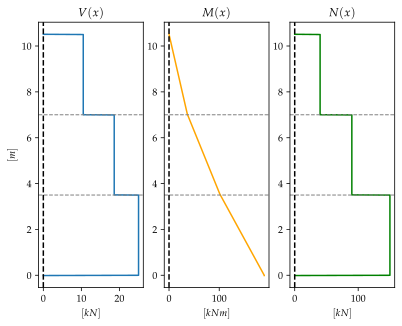

In [32]:
#| label: fig-schnittgroessen
#| fig-cap: "Maximale Schnittgrössen"

# Querkraft
V_x = sp.Piecewise((V_max[0].subs(params)/unit.N, ((x>0)&(x<=H_1.subs(params_plot)))), (V_max[1].subs(params)/unit.N, ((x>=H_1.subs(params_plot))&(x<=(H_1+H_2).subs(params_plot)))), (V_max[2].subs(params)/unit.N, ((x>=(H_1+H_2).subs(params_plot))&(x<=(H_1+H_2+H_3).subs(params_plot)))), (0,True))


# Biegemoment
C_1 = sp.symbols('C_1')
M_x = sp.integrate(-V_x, x) + C_1
C_1_solve = sp.solve(M_x.subs(x, (H_1+H_2+H_3).subs(params_plot)), C_1)[0]
M_x = M_x.subs(C_1, C_1_solve)

# Normalkraft
g = 10*unit.m/unit.second**2
N_x = sp.Piecewise(((m_1+m_2+m_3).subs(params)*g/unit.N, ((x>0)&(x<=H_1.subs(params_plot)))),((m_3+m_2).subs(params)*g/unit.N, ((x>=H_1.subs(params_plot))&(x<=(H_1+H_2).subs(params_plot)))),((m_3).subs(params)*g/unit.N, ((x>=(H_1+H_2).subs(params_plot))&(x<=(H_1+H_2+H_3).subs(params_plot)))), (0,True))



# Numerische Daten generieren
x_array = np.linspace(-0.01, float((H_1+H_2+H_3+.01).subs(params_plot)), 1000)
V_x_lamb = sp.lambdify(x, V_x)
V_x_array = V_x_lamb(x_array)

M_x_lamb = sp.lambdify(x,M_x)
M_x_array = M_x_lamb(x_array)

N_x_lamb = sp.lambdify(x,N_x)
N_x_array = N_x_lamb(x_array)

# Figure und Axes erstellen
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Ersten Plot erstellen

ax1.plot(V_x_array/1000, x_array)
ax1.set_title('$V(x)$')

## Horizontale Linien
ax1.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax1.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax1.set_xlabel('$[kN]$')
ax1.set_ylabel('$[m]$')

ax1.axvline(0,linestyle='dashed', color='black')


# Zweiten Plot erstellen

ax2.plot(M_x_array/1000, x_array, color='orange')
ax2.set_title('$M(x)$')

## Horizontale Linien
ax2.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax2.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)

ax2.set_xlabel('$[kNm]$')

ax2.axvline(0,linestyle='dashed', color='black')


# Dritten Plot erstellen

ax3.plot(N_x_array/1000, x_array, color='green')
ax3.set_title('$N(x)$')
ax3.set_xlabel('$[kN]$')


## Horizontale Linien
ax3.axhline(H_1.subs(params_plot),linestyle='dashed', color='gray',linewidth=1)
ax3.axhline((H_1+H_2).subs(params_plot),linestyle='dashed', color='gray',linewidth=1)


ax3.axvline(0,linestyle='dashed', color='black')



# Plots anzeigen
plt.show()